<a href="https://colab.research.google.com/github/OutWrest/ColabKerasNNProjects/blob/master/Practice_TF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports TF and checks to see if it can find a GPU, (from https://colab.research.google.com/notebooks/gpu.ipynb#scrollTo=3IEVK-KFxi5Z)

In [155]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


List of colors that will only be used:  
red   
orange   
yellow  
green   
cyan  
blue  
violet   
magenta  
black  
white  
  
The NN would identify which RGB value correspons with the text color 

Input array: [R,G,B]  
Output array: [R,O,Y,G,C,B,V,M,B,W]
  
With either 1 or 0 for the output and 1-255 for input which will encoded to 0-1 for simplicity  
The sigmoid function will able to give a probability of the output depending on the input
  


In [219]:
import colorsys
import random

#Change the amount data that will be created
DATA_SET_AMOUNT = 1000000

import numpy as np


random_set = []
for x in range(DATA_SET_AMOUNT):
  random_data = [random.randint(0, 255),random.randint(0, 255),random.randint(0, 255)]
  random_set.append(random_data)

data_set_rgb = np.array(random_set)
print(data_set_rgb)

hsv_set = []
for rgb in data_set_rgb:
  #print(rgb)
  #print(colorsys.rgb_to_hsv(rgb[0],rgb[1],rgb[2]))
  hsv = colorsys.rgb_to_hsv(rgb[0],rgb[1],rgb[2])
  #normalize h on 0-360 range
  hsv_set.append([round(hsv[0]*360),round(hsv[1]*100),round((hsv[2]*100)/255)])

data_set_hsv = np.array(hsv_set)

#print(data_set_hsv)

[[211 157  79]
 [142  24 207]
 [132 136 225]
 ...
 [210 235  81]
 [111 253  92]
 [219 175  23]]


Now to create a y list that knows the colors 

In [220]:
#color index:
red = 0
orange = 1
yellow = 2
green = 3
cyan = 4
blue = 5
violet = 6
magenta = 7
black = 8
white = 9

#a= colorsys.rgb_to_hsv(255,255,200)
#print([round(a[0]*360),round(a[1]*100),round((a[2]*100)/255)]) 

color_set = []
for color_hsv in data_set_hsv:
  _color = [0,0,0,0,0,0,0,0,0,0]
  hue = color_hsv[0]
  sat = color_hsv[1]
  val = color_hsv[2]
  
  #black
  if(val <= 15):
    _color[black] = 1
  #white
  elif(sat <= 15):
    _color[white] = 1
    
  #red
  elif(hue >= 345 or hue < 20):
    _color[red] = 1
  #orange
  elif(hue >= 20 and hue < 45):
    _color[orange] = 1
  #yellow
  elif(hue >= 45 and hue < 75):
    _color[yellow] = 1
  #green
  elif(hue >= 75 and hue < 130):
    _color[green] = 1
  #cyan
  elif(hue >= 130 and hue < 195):
    _color[cyan] = 1
  #blue
  elif(hue >= 195 and hue < 250):
    _color[blue] = 1
  #violet
  elif(hue >= 250 and hue < 285):
    _color[violet] = 1
  #magenta
  elif(hue >= 285 and hue < 345):
    _color[magenta] = 1
  
  color_set.append(_color)

data_color_names = np.array(color_set)

print(data_color_names)

[[0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]]


Change x-list to 0-1 for simplicity

In [221]:
list_ = []
for x in data_set_rgb:
  list__ = []
  for y in x:
    list__.append(y/255)
  list_.append(list__)
list_x = np.array(list_)
print(len(list_x))
print(len(data_color_names))

1000000
1000000


Actual NN

In [222]:
from keras.models import Sequential
from keras.layers import Dense, Activation
model = Sequential()
model.add(Dense(32, input_shape=(3,)))
model.add(Dense(32))
model.add(Dense(10, activation="softmax"))
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(x=list_x, y=data_color_names, epochs=5, verbose=1)

Epoch 1/5
1000000/1000000 [==============================] - 98s 98us/step - loss: 0.0912 - acc: 0.9754
Epoch 2/5
1000000/1000000 [==============================] - 96s 96us/step - loss: 0.0426 - acc: 0.9849
Epoch 3/5
1000000/1000000 [==============================] - 96s 96us/step - loss: 0.0390 - acc: 0.9857
Epoch 4/5
1000000/1000000 [==============================] - 97s 97us/step - loss: 0.0373 - acc: 0.9864
Epoch 5/5
1000000/1000000 [==============================] - 96s 96us/step - loss: 0.0367 - acc: 0.9866


your color is:
my guess is: orange


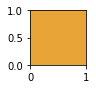

In [242]:
def decodeModel(index):
  red = 0
  orange = 1
  yellow = 2
  green = 3
  cyan = 4
  blue = 5
  violet = 6
  magenta = 7
  black = 8
  white = 9
  if(index == red):
    return "red"
  if(index == orange):
    return "orange"
  if(index == yellow):
    return "yellow"
  if(index == green):
    return "green"
  if(index == cyan):
    return "cyan"
  if(index == blue):
    return "blue"
  if(index == violet):
    return "violet"
  if(index == magenta):
    return "magenta"
  if(index == black):
    return "black"
  if(index == white):
    return "white"
  return "idk"
def encodeModel(array):
  new_array = []
  for x in array:
    new_array.append(x/255)
  return new_array

import matplotlib.pyplot as plt

def plotColor(array):
  fig = plt.figure(figsize=(1, 1))
  ax = fig.add_subplot(1,1,1)
  ax.set_facecolor((array[0],array[1],array[2]))

#creating test list
random_set_test = []
for x in range(100):
  random_data = [random.randint(0, 255),random.randint(0, 255),random.randint(0, 255)]
  random_set_test.append(random_data)

data_set_rgb_test = np.array(random_set_test)




#CHANGE THESE FOR YOUR OWN COLOR
R = random.randint(0,255)
G = random.randint(0,255)
B = random.randint(0,255)
#NOTHING ELSE
print("your color is:")
Guess = np.array(encodeModel([R,G,B]))
plotColor(encodeModel([R,G,B]))
print("my guess is: " + decodeModel(np.argmax((model.predict(np.expand_dims(Guess, 0))))))